# Example for using pandas
a. basic operations  <br>
b. Deal with missing value <br>
c. Visualize data <br>
d. Pre-process data before training <br>
e. etc <br>


In [2]:
import pandas as pd
import os
%matplotlib inline

In [33]:
root_path = "~/Desktop/temp/"

train_identity = pd.read_csv(root_path+'train_identity.csv')
train_transaction = pd.read_csv(root_path+"train_transaction.csv")
"""

test_identity = pd.read_csv(root_path+'test_identity.csv')
test_transaction = pd.read_csv(root_path+"test_transaction.csv")

"""
print("finish loading data")

finish loading data


# Basic operations


In [34]:
train_transaction.iloc[:2,2:4]

,TransactionDT,TransactionAmt
0,86400,68.5
1,86401,29.0


# Deal with missing values & one hot encoder

In [35]:

# Find missing values along each column/row
missing = train_transaction.isnull().sum()


In [37]:
missing = missing[missing > 0]
for col in list(missing.index):
    if train_transaction[col].dtype=="object":
        train_transaction[col].fillna(train_transaction[col].value_counts()[0],inplace=True)
    elif train_transaction[col].dtype=='int64' or 'float64' or 'int16' or 'float16':
        train_transaction[col].fillna(train_transaction[col].median(),inplace=True)

In [38]:
train_transaction.iloc[:4]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,361.0,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
temp = pd.get_dummies(train_transaction)

In [42]:
temp.iloc[:4].shape

(4, 544)

In [44]:
import matplotlib.pyplot as plt

In [46]:
%matplotlib inline

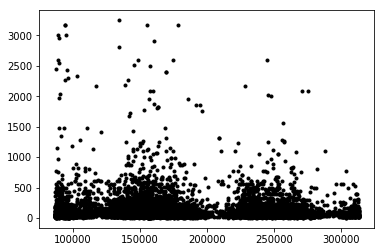

In [59]:
plt.plot(temp.loc[:10000,"TransactionDT"],temp.loc[:10000,"TransactionAmt"],"k.")

In [56]:
temp.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'M6_T', 'M7_211374', 'M7_F', 'M7_T', 'M8_155251', 'M8_F', 'M8_T',
       'M9_205656', 'M9_F', 'M9_T'],
      dtype='object', length=544)